# Análise Descritiva dos dados

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura do Arquivo

In [4]:
input_file = '0-Datasets/loan_trainClear.csv'
names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term','Credit_History', 'Area', 'Status']
features =  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History', 'Area']
target = 'Status'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                     names = names) # Nome das colunas

## Separação das features das targets

In [5]:
# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,[target]].values

## Gráfico de setores

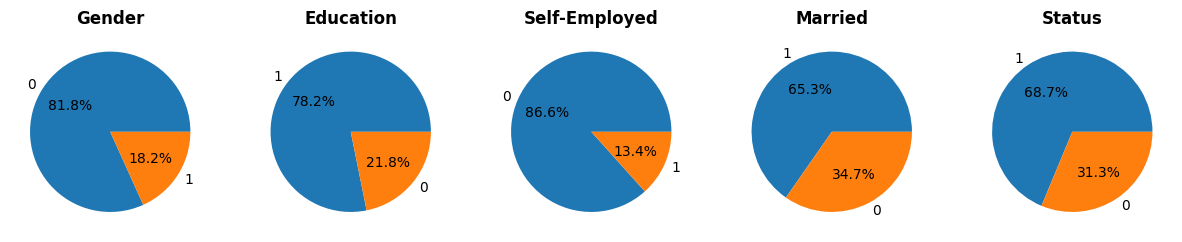

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

gender_pie = df['Gender'].value_counts()
married_pie = df['Married'].value_counts()
educ_pie = df['Education'].value_counts()
selfemp_pie = df['Self_Employed'].value_counts()
status_pie = df['Status'].value_counts()

gender_pie.plot.pie(ax=ax[0], autopct='%1.1f%%')
educ_pie.plot.pie(ax=ax[1], autopct='%1.1f%%')
selfemp_pie.plot.pie(ax=ax[2], autopct='%1.1f%%')
married_pie.plot.pie(ax=ax[3],autopct='%1.1f%%' )
status_pie.plot.pie(ax=ax[4], autopct='%1.1f%%')

plt.subplots_adjust(hspace = 0.5)

for n in np.arange(0,5):
    ax[n].set_ylabel('')
    
ax[0].set_title('Gender', fontweight='bold')
ax[1].set_title('Education', fontweight='bold')
ax[2].set_title('Self-Employed', fontweight='bold')
ax[3].set_title('Married', fontweight='bold')
ax[4].set_title('Status', fontweight='bold')

plt.show()

## Distribuição de frequencia

In [7]:
def ShowHistogram(label, group, labelx):
    ax = group.plot.bar(color='blue')
    plt.xticks(np.arange(11),label)
    plt.show()

15000 8100000
(0, 100000]             6
(100000, 200000]       35
(200000, 300000]      136
(300000, 400000]      157
(400000, 500000]       89
(500000, 600000]       54
(600000, 700000]       34
(700000, 800000]       20
(800000, 900000]       14
(900000, 1000000]      17
(1000000, 8100000]     52
Name: Applicant_Income_group, dtype: int64


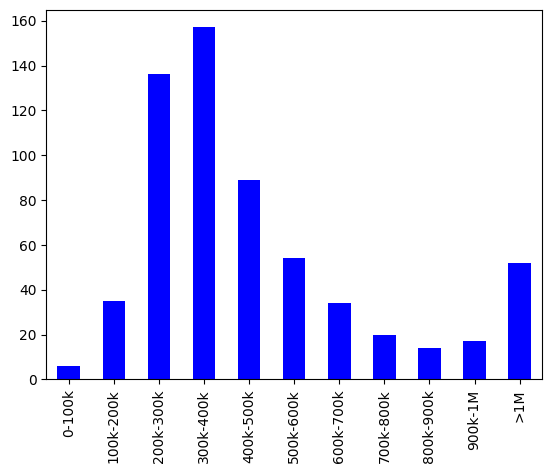

In [8]:
min = df['Applicant_Income'].min()
max = df['Applicant_Income'].max()

print(min, max)
bins = []
for x in range(0, 1000001, 100000):
    bins.append(x)
bins.append(max)

df['Applicant_Income_group'] = pd.cut(df['Applicant_Income'], bins)
print(df['Applicant_Income_group'].value_counts().sort_index())

labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '>1M']
group = df['Applicant_Income_group'].value_counts(sort=False)
ShowHistogram(labels, group, 'Renda do requerente')

# classe_cor = {0 : 'red', 1 : 'green'}
# cores = [classe_cor[nome] for nome in df.Status]

# df.plot(kind='scatter', x='Total_Income', y='EMI', c=cores)

plt.show()

# Balanceamento da Base de dados (Oversample)

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [10]:
x = df.drop(['Status'], axis=1)
y = df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
ros = RandomOverSampler(sampling_strategy=1)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

Base default
 1    343
0    148
Name: Status, dtype: int64
Base balanceada
 0    343
1    343
Name: Status, dtype: int64


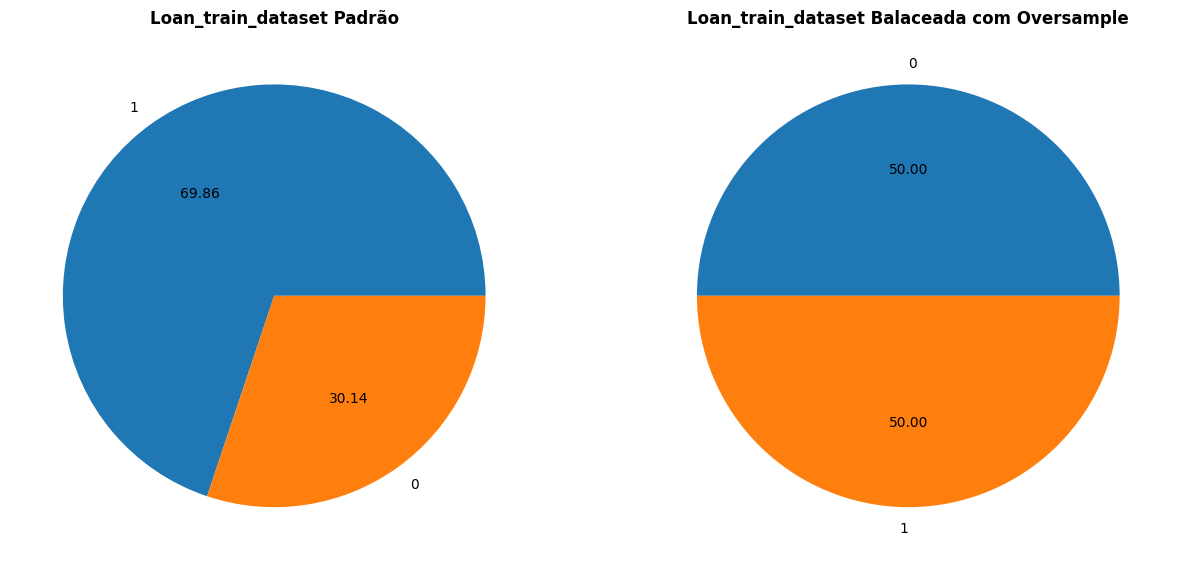

In [15]:
print('Base default\n',y_train.value_counts())
print('Base balanceada\n',y_train_ros.value_counts())

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

y_train.value_counts().plot.pie(ax=ax[0], autopct='%.2f')
y_train_ros.value_counts().plot.pie(ax=ax[1], autopct='%.2f')

plt.subplots_adjust(hspace = 1)

for n in np.arange(0,2):
    ax[n].set_ylabel('')
    
ax[0].set_title('Loan_train_dataset Padrão', fontweight='bold')
ax[1].set_title('Loan_train_dataset Balaceada com Oversample', fontweight='bold')

plt.show()
